In [1]:
!pip install formulaic


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [241]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

from sklearn import linear_model    # Herramientas de modelos lineales
from sklearn.metrics import mean_squared_error, r2_score    # Medidas de desempeño
from sklearn.preprocessing import PolynomialFeatures    # Herramientas de polinomios

from sklearn.model_selection import train_test_split, KFold, cross_val_score

from formulaic import Formula

In [3]:
#1

penguins = sns.load_dataset( "penguins" )
penguins . head ()

penguins.isnull().values.any()

penguins= penguins.dropna()

#


train_ind= np.full( 333 ,False)
train_ind[0:275] = True
np.random.shuffle(train_ind)
penguins_train= penguins[train_ind]
penguins_test= penguins[train_ind==False]

from sklearn . model_selection import train_test_split
penguins_train , penguins_test = train_test_split ( penguins , test_size =0.2 , random_state =42)

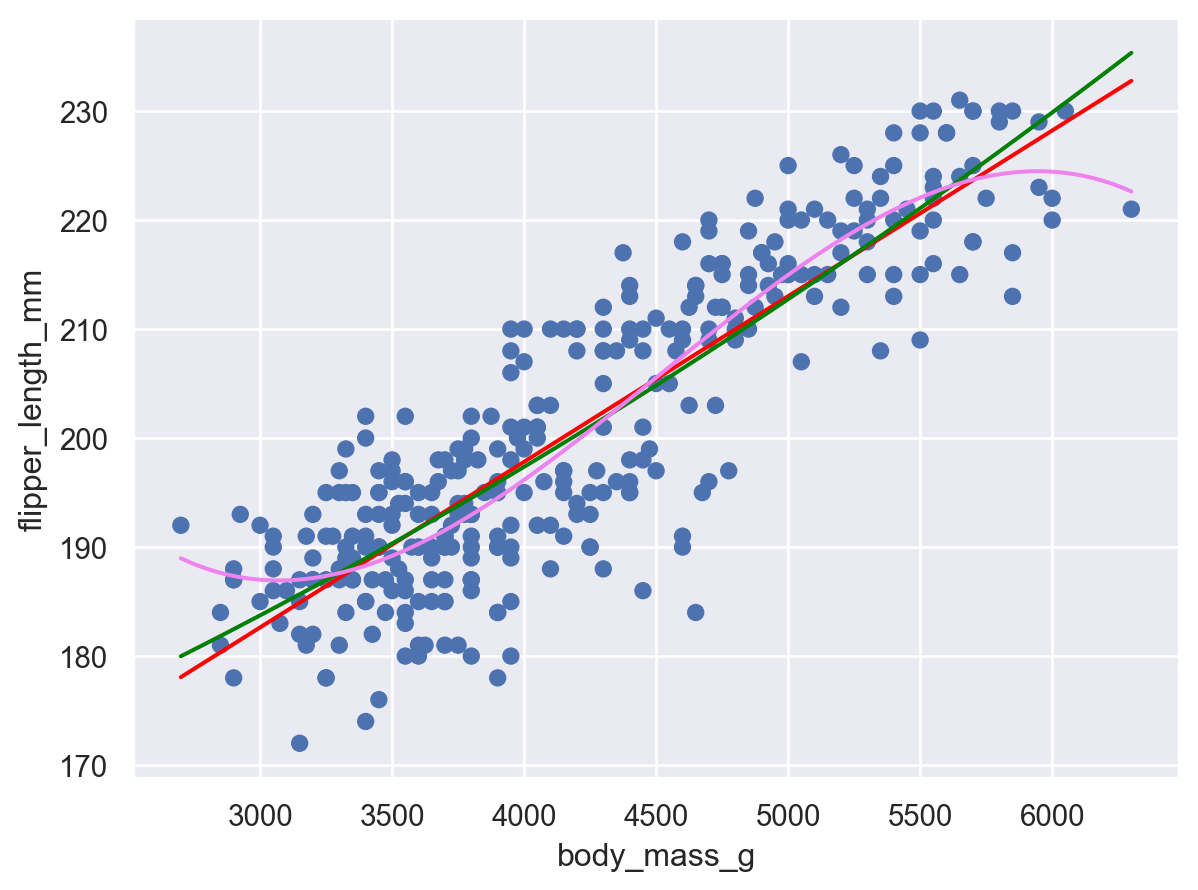

In [4]:
#1
#display(penguins)
display(
    so.Plot(penguins, x="body_mass_g", y="flipper_length_mm")
    .add( so.Dot() )
    .add( so.Line(color="red"), so.PolyFit(1) )
    .add( so.Line(color="green"), so.PolyFit(2) )
    .add( so.Line(color="violet"), so.PolyFit(3) )
)

In [62]:
#display(penguins, penguins_train, penguins_test)

polynomial_ft= PolynomialFeatures(degree=1, include_bias=False)
polynomial_ft2= PolynomialFeatures(degree=2, include_bias=False)
polynomial_ft3= PolynomialFeatures(degree=3, include_bias=False)

x_poly= polynomial_ft.fit_transform(penguins_train[["body_mass_g"]])
x_poly2= polynomial_ft2.fit_transform(penguins_train[["body_mass_g"]])
x_poly3= polynomial_ft3.fit_transform(penguins_train[["body_mass_g"]])

model= linear_model.LinearRegression()
model2= linear_model.LinearRegression()
model3= linear_model.LinearRegression()

model.fit(x_poly,penguins_train[["flipper_length_mm"]] )
model2.fit(x_poly2,penguins_train[["flipper_length_mm"]] )
model3.fit(x_poly3,penguins_train[["flipper_length_mm"]] )


y_pred = model.predict(x_poly)
display("Error de ajuste:", mean_squared_error(penguins_train["flipper_length_mm"], y_pred))
y_pred = model2.predict(x_poly2)
display("Error de ajuste 2:", mean_squared_error(penguins_train["flipper_length_mm"], y_pred))
y_pred = model3.predict(x_poly3)
display("Error de ajuste 3:", mean_squared_error(penguins_train["flipper_length_mm"], y_pred))

y_pred = model.predict(polynomial_ft.fit_transform(penguins_test[["body_mass_g"]]))
display("Error de trans:", mean_squared_error(penguins_test[["flipper_length_mm"]], y_pred))

y_pred = model2.predict(polynomial_ft2.fit_transform(penguins_test[["body_mass_g"]]))
display("Error de trans 2:", mean_squared_error(penguins_test["flipper_length_mm"], y_pred))

y_pred = model3.predict(polynomial_ft3.fit_transform(penguins_test[["body_mass_g"]]))
display("Error de trans 3:", mean_squared_error(penguins_test["flipper_length_mm"], y_pred), r2_score(penguins_test["flipper_length_mm"], y_pred), )

# Mejor modelo, el 3


'Error de ajuste:'

47.430886522555994

'Error de ajuste 2:'

47.19272439883821

'Error de ajuste 3:'

43.563769106556585

'Error de trans:'

43.48926587936529

'Error de trans 2:'

42.829911767766994

'Error de trans 3:'

39.5929341404914

0.809145294200817

,Investigacion,Administracion,Marketing,Estado,Ganancia
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


c:\Users\Ne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


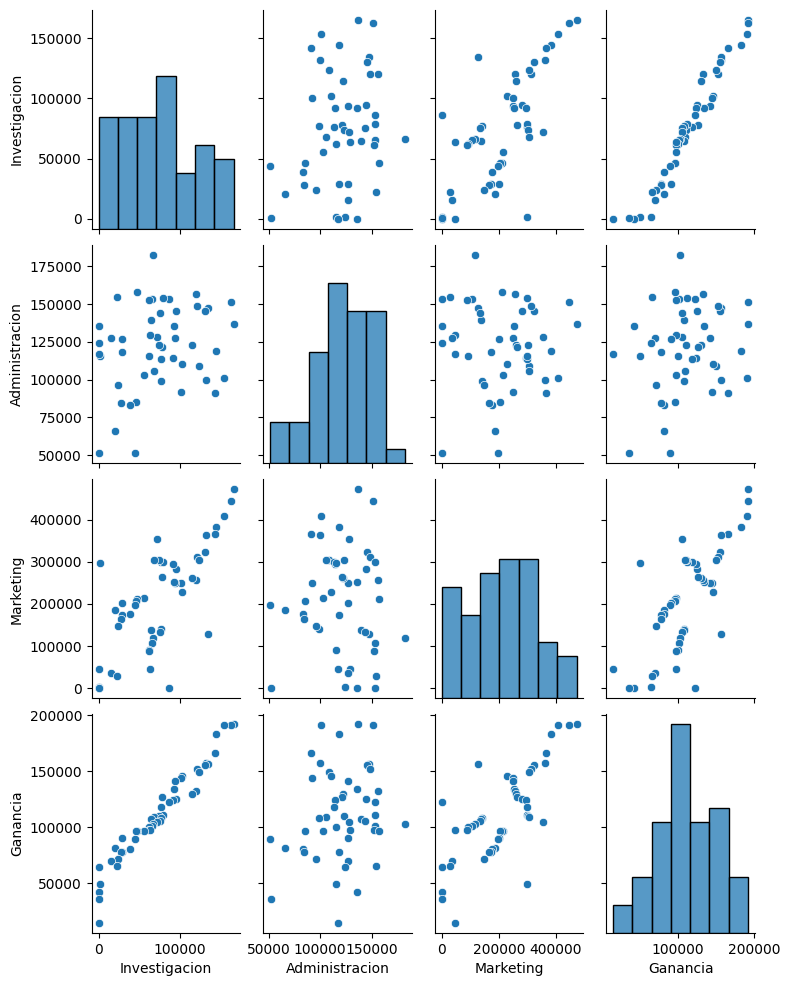

In [8]:
#2

startups= pd.read_csv("50_Startups.csv")

display(startups.head())

sns.pairplot(
    data= startups, aspect= .8
)


0.8476206523535603

49309.898435322124

'Error medio del modelo:'

0.24411619225286152

1533539699.1342227

'Error de ajuste de testeo:'

0.32686942600063573

1354570713.3869348

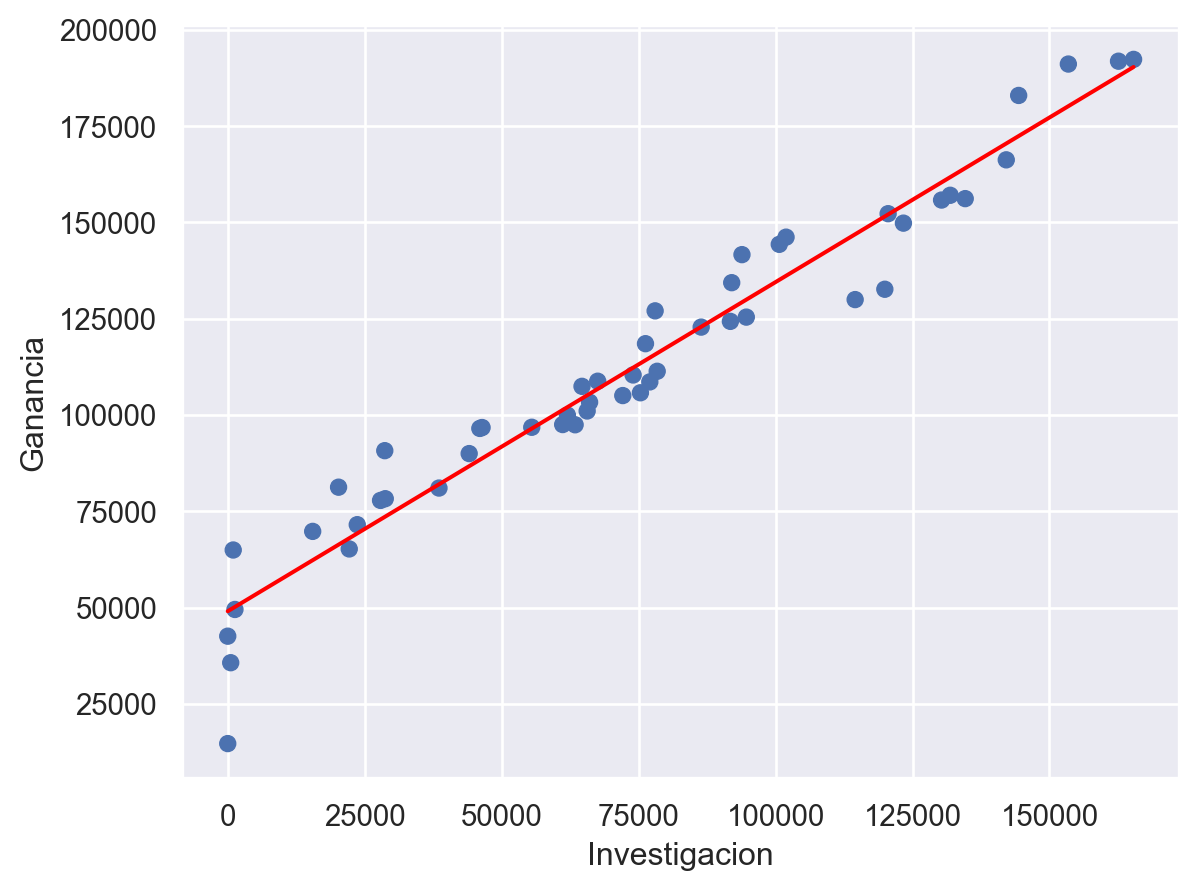

In [9]:
#2

# Usaria investigacion en torno a las ganancias o a lo sumo marketing,
# A simple vista son las que mas se comportan linealmente en torno alas ganancias

# EXPERIMENTO:

from sklearn . model_selection import train_test_split
d_train , d_test = train_test_split ( startups , test_size =0.2 , random_state =5)

model= linear_model.LinearRegression()
model.fit(d_train[["Investigacion"]], d_train[["Ganancia"]])

display(model.coef_[0][0], model.intercept_[0] )

# Datos del modelo
ypred= model.predict(d_train[["Investigacion"]])

display("Error medio del modelo:")
display(r2_score(d_train[['Investigacion']], ypred),
        mean_squared_error(d_train[["Investigacion"]], ypred))

display("Error de ajuste de testeo:")

ypred= model.predict(d_test[["Investigacion"]])
display(r2_score(d_test[['Investigacion']], ypred),
        mean_squared_error(d_test[["Investigacion"]], ypred))

display(
    so.Plot( startups, x="Investigacion", y="Ganancia")
    .add( so.Dot() )
    .add( so.Line(color="red"), so.PolyFit(1))
    )

# Rescato entonces que el R2 no sirve mucho para comparar testeos.
# Lo ideal es rescatar informacion grafica
# Sirve bastante ver la pendiente
# Que sucede cuando tenemos ECM altos?? Y bueno, hay que comparar con la media


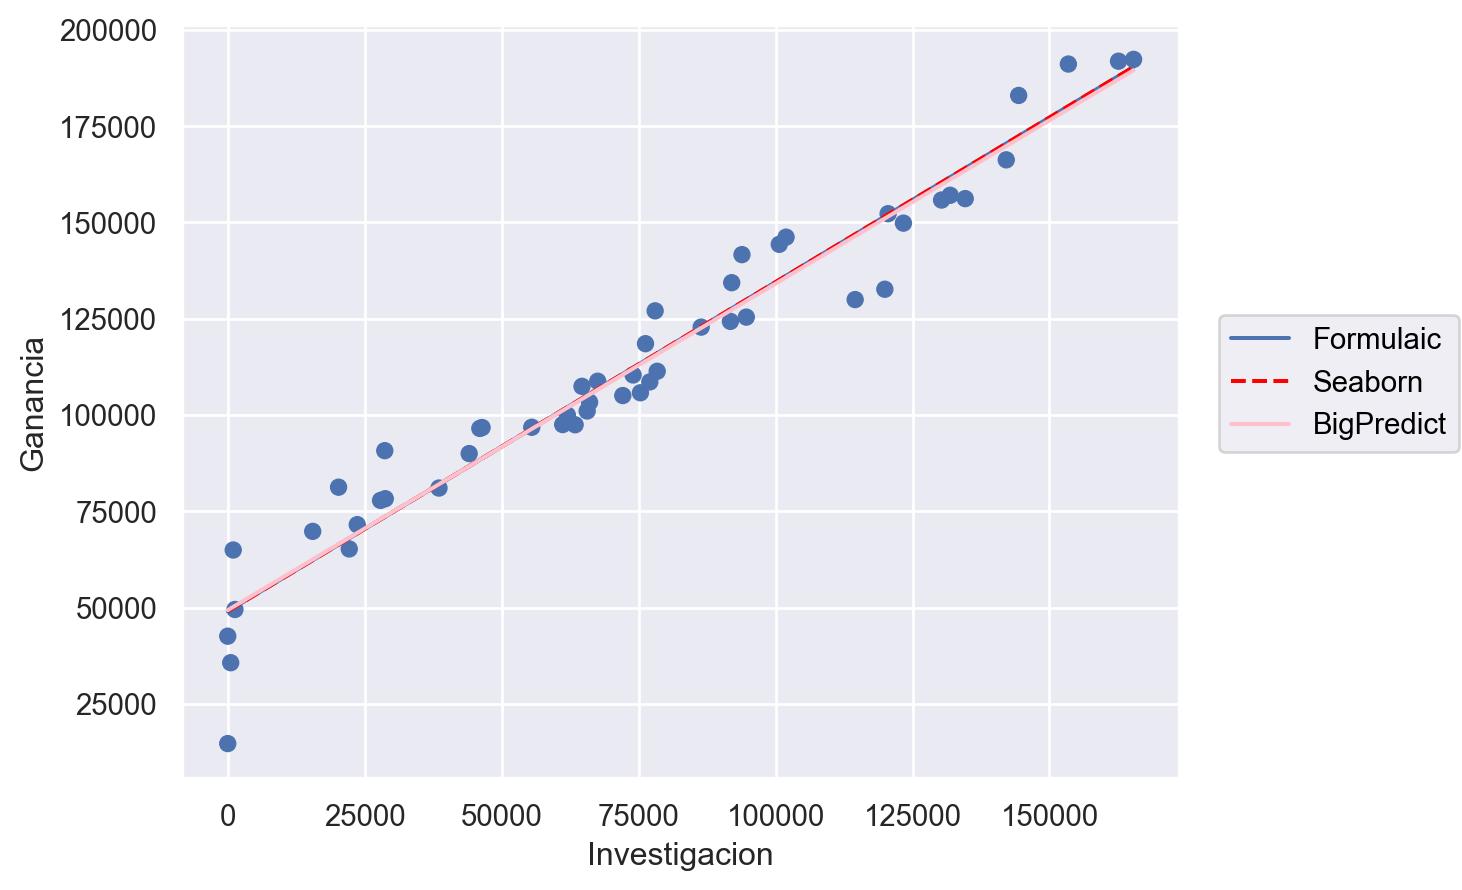

In [10]:
# Una forma mas bonita!

y, X= Formula( "Ganancia ~ poly(Investigacion, 1) " ).get_model_matrix(startups)

modelo= linear_model.LinearRegression(fit_intercept= False)
modelo.fit(X,y)

(
    so.Plot( startups, x="Investigacion", y="Ganancia")
    .add(so.Dot())
    .add( so.Line(), x="Investigacion", y=modelo.predict(X).flatten(), label='Formulaic')
    .add( so.Line(color='red', linestyle='--'), so.PolyFit(1), label='Seaborn')
    .add( so.Line(color="pink"), x="Investigacion", y=model.predict(startups[["Investigacion"]]).flatten(), label="BigPredict")
)

In [11]:
#2. b
# Considero que tiene sentido que un modelo linear multivariable
# Sea mas contundente para poder considerar otras variables como el MK

y, X= Formula("Ganancia ~ Investigacion * poly( Marketing, 3 ) ").get_model_matrix(d_train)
ys, Xs= Formula("Ganancia ~ Investigacion * poly( Marketing, 3 ) ").get_model_matrix(startups)

monstel= linear_model.LinearRegression(fit_intercept=False)
monstel.fit(X,y)

(
    so.Plot( startups, x="Investigacion", y="Ganancia")
    .add(so.Dot())
    .add( so.Line(color="red"), x="Investigacion", y=monstel.predict(Xs).flatten(), label='Formulaic')
)

# Ya a simple vista los errores son mucho menores al lineal pero miren

mean_squared_error(monstel.predict(Xs), ys)

# LIT ES 18 VECES MAS CHICO

82362036.35371485

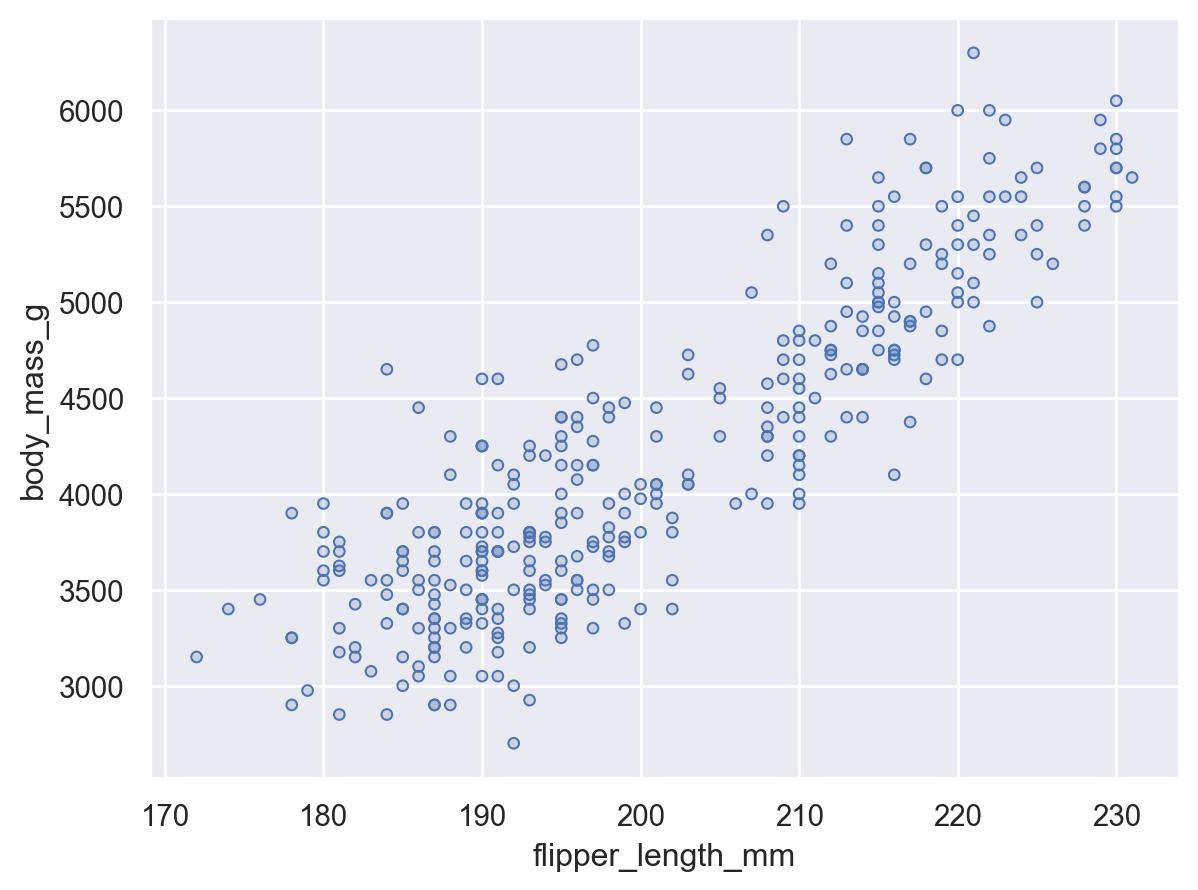

In [12]:
penguins = sns.load_dataset( "penguins" )
penguins . head ()
y, X = Formula("body_mass_g ~ sex * flipper_length_mm").get_model_matrix(penguins)
model = linear_model.LinearRegression(fit_intercept= False)
model.fit(X,y)


display(
so.Plot(penguins, x="flipper_length_mm", y="body_mass_g")
.add(so.Dots())
#.add(so.Line(), x="flipper_length_mm", y= model.predict(X).flatten())
)

' Coeficientes : [[ 3999.91501336   382.24290197 10709.91830521  1482.02592148\n  -1437.08426073 -1741.11801518  1189.02037739   -13.47037681]]'

' ECM : 98693.63281918358'

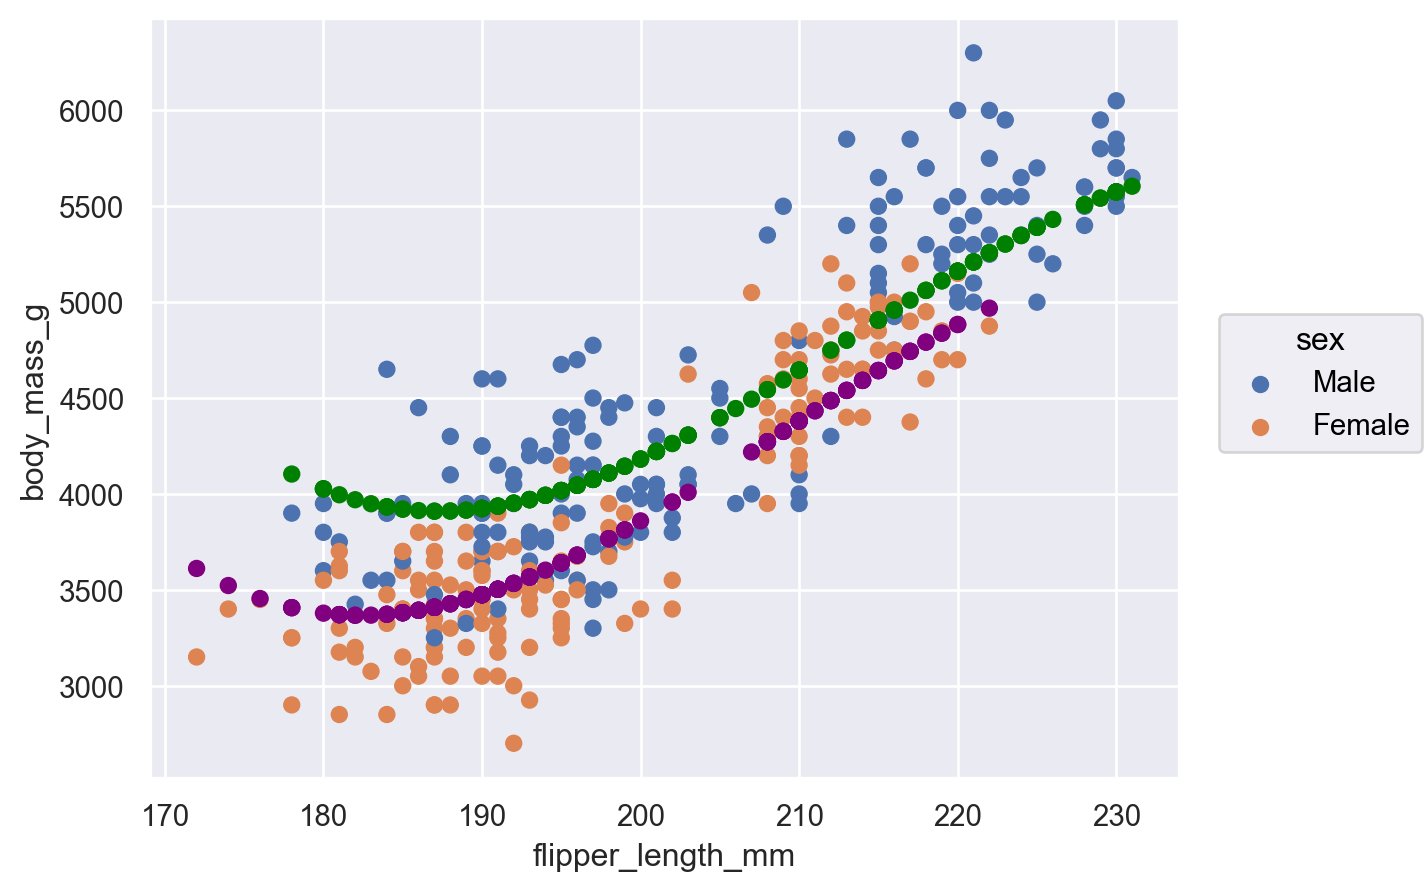

' ECM : 0.8377050970569244'

620.6118287923023

In [147]:
# EJERCICIO 3

# Sexo es categorica, toma valores binarios. Aunque ciertameste es mas un "estoy, no estoy"

# Cual es la representacion (???)


penguis = sns.load_dataset("penguins")

penguins= penguins.dropna()

from sklearn.model_selection import train_test_split
penTrain , penTest = train_test_split(penguins, test_size=0.25, random_state=5)

Form ="body_mass_g ~ sex * poly(flipper_length_mm, 3)"
y, X = Formula(Form).get_model_matrix(penTrain)
yt, Xt = Formula(Form).get_model_matrix(penguins)


model = linear_model.LinearRegression(fit_intercept=False)
model.fit(X,y)

# Ya a simple vista los errores son mucho menores al lineal pero miren

display( f" Coeficientes : {model.coef_}")
display(f" ECM : {mean_squared_error(y, model.predict(X))}")

display()

display(
    so.Plot(  )
    .add(so.Dot(), data = penguins, y="body_mass_g", x="flipper_length_mm", color="sex")
    .add(so.Dot( color="green"), data= penguins[penguins ["sex"] == "Male"], x="flipper_length_mm", y= model.predict(Xt[Xt["sex[T.Male]"] == 1]).flatten())
    .add(so.Dot( color="purple"), data= penguins[penguins ["sex"] == "Female"], x="flipper_length_mm", y= model.predict(Xt[Xt["sex[T.Male]"] == 0]).flatten())
)

# Considero que si lo mejora, ya que tiene sentido considerar la diferencia morfologica entre los pinguinos

# Si queremos verlo mas precisamente

#  mean_squared_error(penguins_test["flipper_length_mm"], y_pred)
display(f" ECM : {r2_score(y, model.predict(X))}")

# Es decir, si consideramos la mejor aproximacion polinomica que conseguimos en la ecuacion
# Es conveniente, nos deja un mejor R2 y un mejor ECM!

# Aunque precisamente depende de en que rango estemos del largo de la aleta.




data= [["Adelie", "Torgersen", 39.1, 18.7, 181.0, 4750.0, "Male"] ,["Adelie", "Torgersen", 39.1, 18.7, 181.0, 4750.0, "Female"]]
data= pd.DataFrame(data,  columns=['species', 'island','bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','sex'])
data =  pd.concat([data, penguins]). reset_index()

yd, Xd = Formula(Form).get_model_matrix(data)
# 
# display(Xd)


# 620 de diferencia
(model.predict(Xd)[0] - model.predict(Xd)[1]).item()


' Coeficientes: [[ 3635.97464436   269.17985323  1798.04556317 -3665.10944421\n  -8282.64740612 -4061.41519341 10272.87959861 -5843.06690075\n   8377.40037706 23313.52689538  2489.11602713 -1794.3098612 ]]'

' ECM : 121990.45678866922'

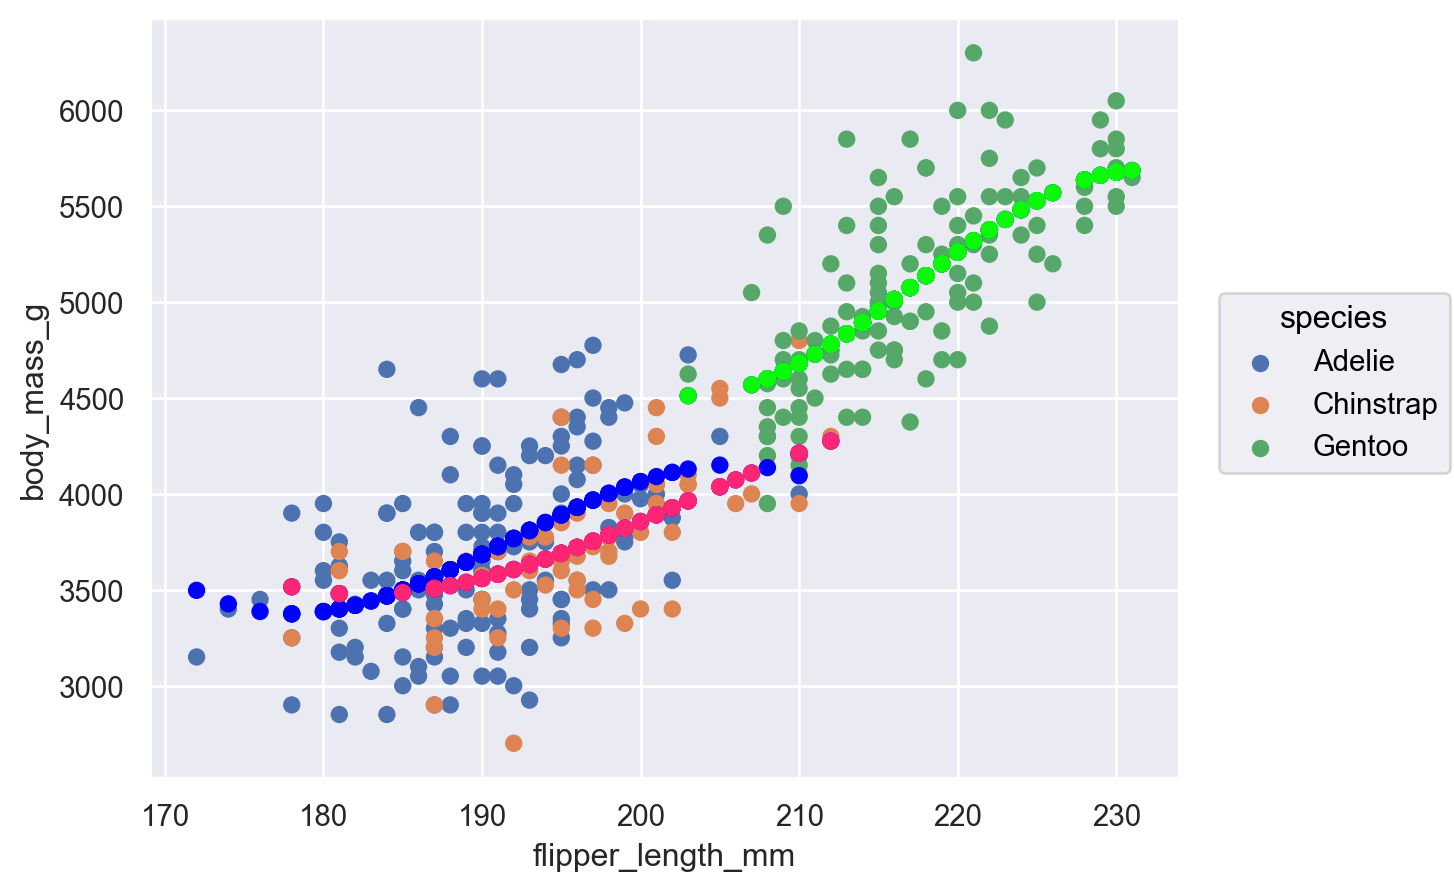

In [198]:
# EJERCICIO 4

# La especie no es una variable binaria, pero si es categorica
# toma como tal 3 posibles valores, aunque uno tecnicamente es descartado
# Son 2 columnas de valores binarios. Eso si...

# Escribirlo en papel (???)

# Es decir, hay varias diferencias... La dimensionalidad seguro es una de ellas
# La complejidad, y bueno, que uno es una aproximacion simple y esta es mas compleja

penguis = sns.load_dataset("penguins")

penguins= penguins.dropna()

from sklearn.model_selection import train_test_split
penTrain , penTest = train_test_split(penguins, test_size=0.25, random_state=5)

Form ="body_mass_g ~ species * poly(flipper_length_mm, 3)"

y, X = Formula(Form).get_model_matrix(penTrain)
ytest, Xtest = Formula(Form).get_model_matrix(penTest)
yt, Xt = Formula(Form).get_model_matrix(penguins)

model= linear_model.LinearRegression( fit_intercept= False)
model.fit(X,y)

display( f" Coeficientes: {model.coef_}", f" ECM : {mean_squared_error(y, model.predict(X))}")

display(
    so.Plot()
    .add( so.Dot(), color="species", data=penguins ,x="flipper_length_mm", y="body_mass_g")
    .add( so.Dot(color="#0000ff"), data=penguins , x="flipper_length_mm", y= model.predict( Xt ).flatten())
    .add( so.Dot(color="#ff2575"), data=penguins[penguins["species"] == "Chinstrap"] , x="flipper_length_mm", y= model.predict( Xt[Xt["species[T.Chinstrap]"] == 1] ).flatten())
    .add( so.Dot(color="#0aFA0a"), data=penguins[penguins["species"] == "Gentoo"] , x="flipper_length_mm", y= model.predict( Xt[Xt["species[T.Gentoo]"] == 1] ).flatten())
)



,superficie,precio,zona
0,110.0,454.425690,Zona 2
1,109.0,383.004114,Zona 2
2,101.0,437.362638,Zona 2
3,58.0,304.392486,Zona 3
4,129.0,620.027722,Zona 3
...,...,...,...
164,116.0,525.953698,Zona 3
165,118.0,582.190837,Zona 3
166,52.0,200.256009,Zona 1
167,37.0,151.569142,Zona 1


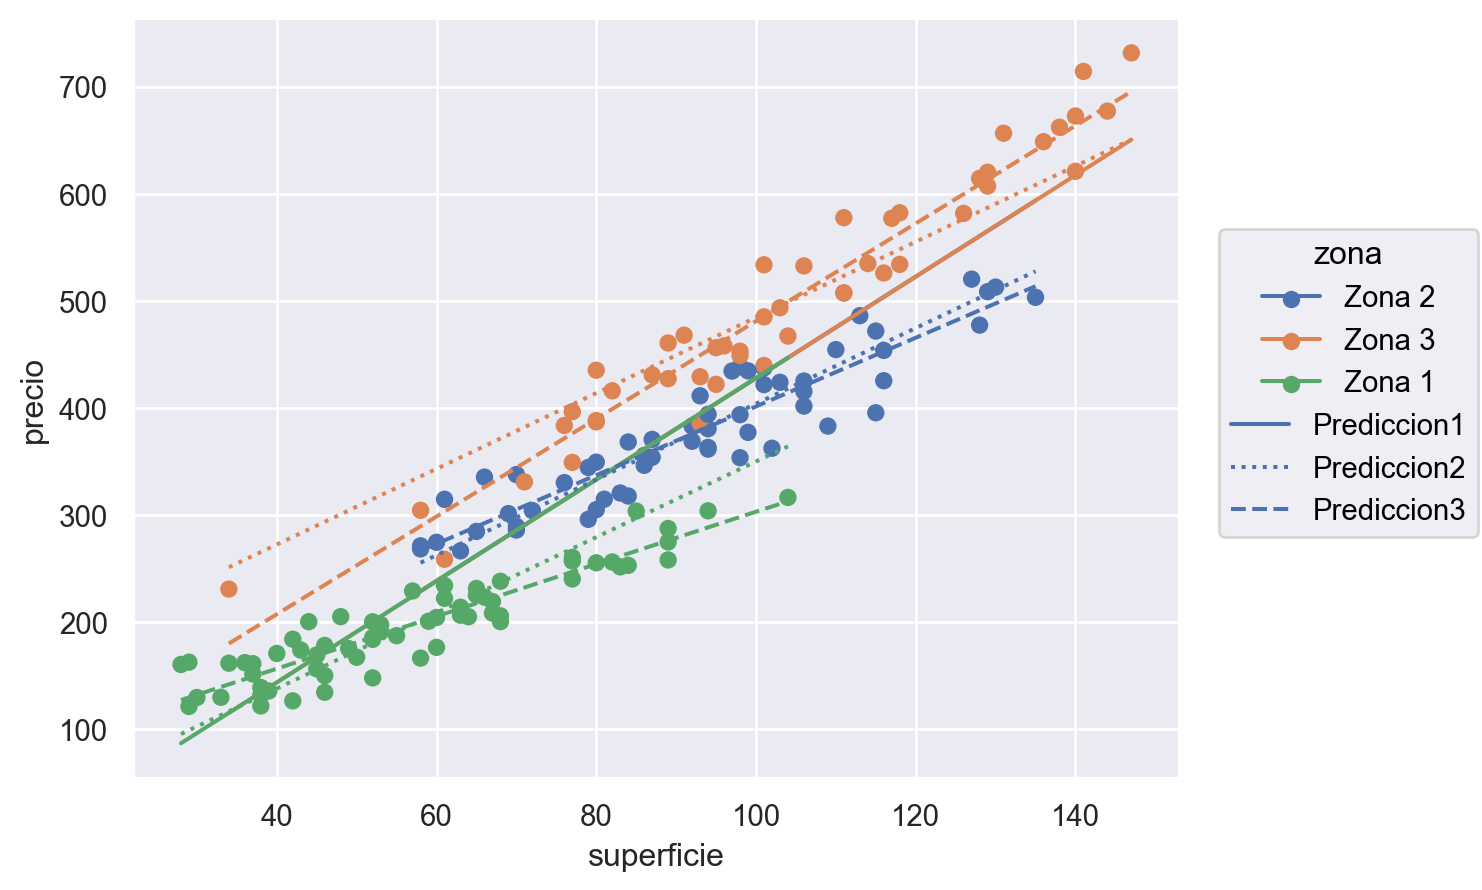

In [220]:
# EJERCICIO 5

# NIVEL 1
inmuebles = pd.read_csv("inmuebles.csv")

Form1= "precio ~ superficie"
Form2= "precio ~ superficie + zona"
Form3= "precio ~ superficie * zona"

y1, X1 = Formula(Form1).get_model_matrix(inmuebles)
y2, X2 = Formula(Form2).get_model_matrix(inmuebles)
y3, X3 = Formula(Form3).get_model_matrix(inmuebles)

modelA= linear_model.LinearRegression( fit_intercept=False)
modelB= linear_model.LinearRegression( fit_intercept=False)
modelC= linear_model.LinearRegression( fit_intercept=False)

modelA.fit(X1, y1)
modelB.fit(X2, y2)
modelC.fit(X3, y3)

display(
    so.Plot( inmuebles, x="superficie", y="precio")
    .add( so.Dot(), color="zona")
    .add( so.Line(), y = modelA . predict ( X1) . flatten (), color="zona", label="Prediccion1")
    .add( so.Line(linestyle='dotted'), y = modelB . predict ( X2) . flatten (), color="zona", label="Prediccion2")
    .add( so.Line(linestyle='--'), y = modelC . predict ( X3) . flatten (), color="zona", label="Prediccion3")
)

In [228]:
# EJERCICIO 5
# NIVEL 2

inmuebles = pd.read_csv("inmuebles.csv")

from sklearn.model_selection import train_test_split
inTrain , inTest = train_test_split(inmuebles, test_size=0.25, random_state=5)

Form1= "precio ~ superficie"
Form2= "precio ~ superficie + zona"
Form3= "precio ~ superficie * zona"

y1, X1 = Formula(Form1).get_model_matrix(inTrain)
yTest1, XTest1 = Formula(Form1).get_model_matrix(inTest)

y2, X2 = Formula(Form2).get_model_matrix(inTrain)
yTest2, XTest2 = Formula(Form2).get_model_matrix(inTest)

y3, X3 = Formula(Form3).get_model_matrix(inTrain)
yTest3, XTest3 = Formula(Form3).get_model_matrix(inTest)


modelA= linear_model.LinearRegression( fit_intercept=False)
modelB= linear_model.LinearRegression( fit_intercept=False)
modelC= linear_model.LinearRegression( fit_intercept=False)

modelA.fit(X1, y1)
modelB.fit(X2, y2)
modelC.fit(X3, y3)

display(f"Model 1 - {mean_squared_error(yTest1, modelA.predict(XTest1))} - {r2_score(yTest1, modelA.predict(XTest1))}")
display(f"Model 2 - {mean_squared_error(yTest2, modelB.predict(XTest2))} - {r2_score(yTest2, modelB.predict(XTest2))}")
display(f"Model 3 - {mean_squared_error(yTest3, modelC.predict(XTest3))} - {r2_score(yTest3, modelC.predict(XTest3))}")

# Es mejor el mio jeje

'Model 1 - 3003.165636602693 - 0.8839003844946461'

'Model 2 - 1443.643263045698 - 0.9441900820508511'

'Model 3 - 869.0748083949437 - 0.9664023689302121'

In [265]:
# EJERCICIO 5
# NIVEL 3

inmuebles = pd.read_csv("inmuebles.csv")

from sklearn.model_selection import train_test_split
inAux , inTest = train_test_split(inmuebles, test_size=0.25, random_state=5)

inTrain , inValidate = train_test_split(inAux, test_size=0.25, random_state=5)

Form1= "precio ~ superficie"
Form2= "precio ~ superficie + zona"
Form3= "precio ~ superficie * zona"

y1, X1 = Formula(Form1).get_model_matrix(inTrain)
yVal1, XVal1 = Formula(Form1).get_model_matrix(inValidate)

y2, X2 = Formula(Form2).get_model_matrix(inTrain)
yVal2, XVal2 = Formula(Form2).get_model_matrix(inValidate)

y3, X3 = Formula(Form3).get_model_matrix(inTrain)
yVal3, XVal3 = Formula(Form3).get_model_matrix(inValidate)


modelA= linear_model.LinearRegression( fit_intercept=False)
modelB= linear_model.LinearRegression( fit_intercept=False)
modelC= linear_model.LinearRegression( fit_intercept=False)

modelA.fit(X1, y1)
modelB.fit(X2, y2)
modelC.fit(X3, y3)

display(f"Model 1 - {mean_squared_error(yVal1, modelA.predict(XVal1))} - {r2_score(yVal1, modelA.predict(XVal1))}")
display(f"Model 2 - {mean_squared_error(yVal2, modelB.predict(XVal2))} - {r2_score(yVal2, modelB.predict(XVal2))}")
display(f"Model 3 - {mean_squared_error(yVal3, modelC.predict(XVal3))} - {r2_score(yVal3, modelC.predict(XVal3))}")

# El modelo 3 es el que mejor me queda
# Lo uso.

inRetrain= pd.concat([inTest, inValidate])


y3, X3 = Formula(Form3).get_model_matrix(inRetrain)
modelC.fit(X3, y3)
display(f"Model Final - { mean_squared_error(yVal3, modelC.predict(XVal3))**(1/2) } - {r2_score(yVal3, modelC.predict(XVal3))}")

'Model 1 - 1691.187999625854 - 0.9069004808703918'

'Model 2 - 862.8931059123751 - 0.9524979285339839'

'Model 3 - 616.2619929611731 - 0.9660749158489581'

'Model Final - 23.958277396311974 - 0.9684014810372801'

In [250]:
inmuebles = pd.read_csv("inmuebles.csv")

from sklearn.model_selection import train_test_split
inAux , inTest = train_test_split(inmuebles, test_size=0.25, random_state=5)

inTrain , inValidate = train_test_split(inAux, test_size=0.25, random_state=5)

Form1= "precio ~ superficie"
Form2= "precio ~ superficie + zona"
Form3= "precio ~ superficie * zona"

y1, X1 = Formula(Form1).get_model_matrix(inTrain)
yVal1, XVal1 = Formula(Form1).get_model_matrix(inValidate)

y2, X2 = Formula(Form2).get_model_matrix(inTrain)
yVal2, XVal2 = Formula(Form2).get_model_matrix(inValidate)

y3, X3 = Formula(Form3).get_model_matrix(inTrain)
yVal3, XVal3 = Formula(Form3).get_model_matrix(inValidate)

modelA= linear_model.LinearRegression( fit_intercept=False)
modelB= linear_model.LinearRegression( fit_intercept=False)
modelC= linear_model.LinearRegression( fit_intercept=False)


In [266]:
# k fold validation cruzada en los 3 modelso

# Modelo A
cv= KFold(n_splits=5, random_state=54, shuffle=True)


rmse1 = np.zeros(cv.get_n_splits())  # Vamos a guardar el error en cada pliego
ind = 0

# Para seleccionar algunas filas dados los índices, utilizamos iloc (lo vimos en la clase 2)
for train_index, val_index in cv.split(X1):
    X_train, X_val, y_train, y_val = X1.iloc[train_index], X1.iloc[val_index], y1.iloc[train_index], y1.iloc[val_index]
    modelA.fit(X_train, y_train)
    
    y_pred = modelA.predict(X_val)
    rmse1[ind] = np.sqrt(mean_squared_error(y_val, y_pred))
    ind = ind + 1

print(rmse1)
print(rmse1.mean())  # Este es el valor que queremos minimizar


[42.43283779 48.07712989 54.09211003 69.09428682 67.25155008]
56.189582921349654


In [267]:

# Modelo B
cv= KFold(n_splits=5, random_state=54, shuffle=True)


rmse2 = np.zeros(cv.get_n_splits())  # Vamos a guardar el error en cada pliego
ind = 0

# Para seleccionar algunas filas dados los índices, utilizamos iloc (lo vimos en la clase 2)
for train_index, val_index in cv.split(X2):
    X_train, X_val, y_train, y_val = X2.iloc[train_index], X2.iloc[val_index], y2.iloc[train_index], y2.iloc[val_index]
    modelB.fit(X_train, y_train)
    
    y_pred = modelB.predict(X_val)
    rmse2[ind] = np.sqrt(mean_squared_error(y_val, y_pred))
    ind = ind + 1

print(rmse2)
print(rmse2.mean())  # Este es el valor que queremos minimizar


[22.93948596 29.96241411 21.708624   44.85062152 28.59191345]
29.61061180945766


In [268]:

# Modelo C
cv= KFold(n_splits=5, random_state=54, shuffle=True)


rmse3 = np.zeros(cv.get_n_splits())  # Vamos a guardar el error en cada pliego
ind = 0

# Para seleccionar algunas filas dados los índices, utilizamos iloc (lo vimos en la clase 2)
for train_index, val_index in cv.split(X3):
    X_train, X_val, y_train, y_val = X3.iloc[train_index], X3.iloc[val_index], y3.iloc[train_index], y3.iloc[val_index]
    modelC.fit(X_train, y_train)
    
    y_pred = modelC.predict(X_val)
    rmse3[ind] = np.sqrt(mean_squared_error(y_val, y_pred))
    ind = ind + 1

print(rmse3)
print(rmse3.mean())  # Este es el valor que queremos minimizar


[21.18356087 24.09591675 28.23571111 25.80217742 25.5150267 ]
24.96647856989886


In [269]:
# En k 5 folds claramente gana el modelo C

# Ajustamos nuestro modelo ganador en TODO el conjunto de entrenamiento. 
modelC.fit(X3, y3)

# Realizamos las mismas transformaciones en el conjunto de testeo
y_test, X_test = (
    Formula(Form3)
    .get_model_matrix(inTest)
)

# Predicciones
y_pred = modelC.predict(X_test)

# Bondad del ajuste
r2 = r2_score(y_test, y_pred)
print('R^2: ', r2)
ecm = mean_squared_error(y_test, y_pred)
print('Raiz cuadarada del ECM: ', np.sqrt(ecm))

R^2:  0.9811901004993213
Raiz cuadarada del ECM:  22.058068944878297


In [283]:
# EJERCICIO 6

df = pd . read_csv ("credit.csv")
display(df)

columns = ["Income", "Limit","Rating","Cards","Age", "Education"]
df [ columns ] /= df [ columns ]. max ()

# en ridge es muy util enviar todo a el mismo rango


,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


Para alpha = 0.00100 la raíz del Error Cuadratico Medio es: 359.40658
Para alpha = 0.01300 la raíz del Error Cuadratico Medio es: 357.89988
Para alpha = 0.01000 la raíz del Error Cuadratico Medio es: 357.89931
Para alpha = 0.01500 la raíz del Error Cuadratico Medio es: 357.94217


In [303]:
# En base a lo anterior el alpha optimo es 0.13

# B


alpha_optimo = 0.013
formulita=     "Income ~ (Balance + Cards + Age) * Student * Gender"

dataTrain, dataTest =  train_test_split(df, test_size=0.25, random_state=5)

y, X= Formula( formulita ).get_model_matrix( dataTrain )
yt, Xt= Formula( formulita ).get_model_matrix( dataTest )

modeloLineal = linear_model.LinearRegression(fit_intercept=False)
modeloLineal.fit(X,y)

display(f"El RCEM del modelo lineal es: { mean_squared_error(yt, modeloLineal.predict(Xt)) **(1/2)}")
display(f"El RCEM del modelo lineal es: { r2_score(yt, modeloLineal.predict(Xt)) **(1/2)}")



# modeloRidge = linear_model.Ridge(alpha = alpha_optimo, fit_intercept = False)    # Inicializamos un modelo de Regresion Lineal sin intercept
# modeloRidge.fit(X, y)

'El RCEM del modelo lineal es: 0.1435416540307931'

'El RCEM del modelo lineal es: 0.42847963353137974'

In [300]:

alphas = pd.array([0.45, 0.5, 0.54])
# alphas= np.array([0.001, 0.005, 0.01, 0.02, 0.1, 0.5, 1])

for alpha in alphas:
    # Inicializamos un modelo de Regresion Lineal sin intercept
    modeloRidge = linear_model.Ridge(alpha = alpha, fit_intercept = False)    
    rmse = np.zeros(cv.get_n_splits())  # Vamos a guardar el error en cada pliego

    ind = 0

    # Para seleccionar algunas filas dados los índices, utilizamos iloc (lo vimos en la clase 2)
    for train_index, val_index in cv.split(X):
        X_train, X_val, y_train, y_val = X.iloc[train_index], X.iloc[val_index], y.iloc[train_index], y.iloc[val_index]
        modeloRidge.fit(X_train, y_train)

        y_pred = modeloRidge.predict(X_val)
        rmse[ind] = np.sqrt(mean_squared_error(y_val, y_pred))
        ind = ind + 1

    print(f"Para alpha = {alpha:.5f} la raíz del Error Cuadratico Medio es: {rmse.mean():.5f}")


# Mejor alpha que encontre 0.54


Para alpha = 0.45000 la raíz del Error Cuadratico Medio es: 0.18013
Para alpha = 0.50000 la raíz del Error Cuadratico Medio es: 0.18002
Para alpha = 0.54000 la raíz del Error Cuadratico Medio es: 0.17994


In [304]:
# Ajustamos el modelo ridge
reqAlpha= 0.54
modeloLineal = linear_model.Ridge(alpha= reqAlpha, fit_intercept=False)
modeloLineal.fit(X,y)

display(f"El RCEM del modelo lineal es: { mean_squared_error(yt, modeloLineal.predict(Xt)) **(1/2)}")
display(f"El RCEM del modelo lineal es: { r2_score(yt, modeloLineal.predict(Xt)) **(1/2)}")


# Tenemos mejores resultados en el ultimo (no tan notorios)

'El RCEM del modelo lineal es: 0.14116000469654566'

'El RCEM del modelo lineal es: 0.4587610535673418'